# 60mer design

## 0 Introduction
Investigation of the predicted (SignalP) and synthetic (AutoML) signal peptide sequences requires testing under lab conditions to measure the peptide abundances. In order to achieve this, an experimental design needs to be structured and set of primers should be constructed for the insertion of the desired signal peptide sequences into the chromosome of the _A. oryzae_ RIB40


### Agenda:
- Isolate the top 10-15 signalP sequences 
- Construct primers to insert singalP sequences 

In [1]:
import pandas as pd
from IPython.display import Image
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

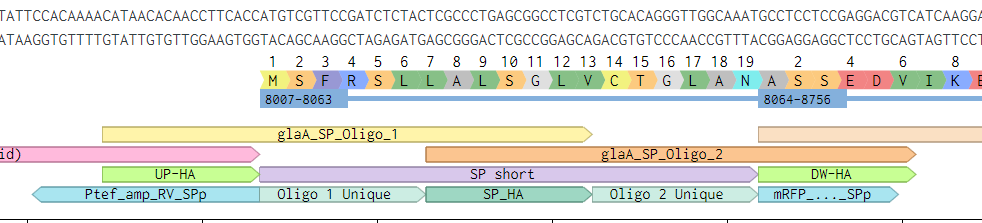

In [2]:
Image(filename='../Data/primer_design.png')

In [3]:
path_to_cds_file = '../Data/FungiDB-62_AoryzaeRIB40_AnnotatedCDSs.fasta'  

# Create an empty lists to hold annotated coding sequences (CDSs)
cds_seqrecords = []

# Open file with "with" statement to avoid problems with access 
with open(path_to_cds_file , mode='r') as handle:
    for record in SeqIO.parse(handle, 'fasta'):

        # Extract individual parts of the FASTA record
        identifier = record.id
        description = record.description
        sequence = record.seq
        # append the CDs into the empty list
        cds_seqrecords.append(record)

cds_seqrecords[:3]

[SeqRecord(seq=Seq('ATGCTAATCTCATCAGTGGCGAAGGATGGCTATGGGAAAGACATCTGGACCCTC...TAG'), id='AO090005000001-T', name='AO090005000001-T', description='AO090005000001-T | organism=Aspergillus_oryzae_RIB40 | product=protein of unknown function | location=Chr1_A_oryzae_RIB40:6423868-6424804(+) | length=937 | sequence_SO=chromosome | SO=protein_coding_gene', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGGACTTGTTGAGACTTCGCGATAGATCCCTGCTGGGCCAAGGCGCCCTTGTC...TGA'), id='AO090005000002-T', name='AO090005000002-T', description='AO090005000002-T | organism=Aspergillus_oryzae_RIB40 | product=Cytochrome P450 monooxygenase | location=Chr1_A_oryzae_RIB40:6420918-6422730(-) | length=1813 | sequence_SO=chromosome | SO=protein_coding_gene', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGGCGATTGCCGCTGCAGTATCCAGTAATGACGTGCTCAAGGGCGTGCCCGAA...TAG'), id='AO090005000003-T', name='AO090005000003-T', description='AO090005000003-T | organism=Aspergillus_oryzae_RIB40 | product=Has domain(s) with predicted ATP binding, glucose binding, he

In [4]:
# Load the latest form of the singalP dataset
df_signalP = pd.read_csv('../Data/07_H2O_AutoML/ML_rnaseq_normalized_signal_peptides.csv')

# Filter the acccessions which are 22 bp or shorter and isolate the top 25 values
df_signalP_filtered = df_signalP[df_signalP["length"] <= 22]
top25_signalP = df_signalP_filtered.head(25).reset_index(drop=True)
top25_signalP

,Accession,sequence,length,normalized abundances
0,AO090103000076,MLRVSAIFMACLLLATAA,18,9.256200e+08
1,AO090113000063,MPIKSFASRLALSLAICGTAM,21,3.866492e+08
2,AO090701000295,MHLPTLVTLACMAVSAS,17,2.478667e+08
3,AO090020000710,MKVAIFSTLLPLVLALPAPQT,21,1.108274e+08
4,AO090020000162,MRSTLWSLLGLTGLAY,16,4.020455e+07
5,AO090003001484,MQFKNLALAASIVATAAAAPAA,22,3.972723e+07
6,AO090011000808,MLLTQSLFFAFACWQATPAL,20,3.551336e+07
7,AO090113000062,MQLYKVFAVLAALQPAL,17,1.800519e+07
8,AO090020000698,MILKSALTAVVLCLAVEGAA,20,1.626016e+07
9,AO090003000354,MRSLLWASLLSGVL,14,1.615078e+07


In [5]:
# Isolate a list of the first 25 accessions
top25_signalP_accessions = top25_signalP["Accession"].tolist()
print(top25_signalP_accessions)

['AO090103000076', 'AO090113000063', 'AO090701000295', 'AO090020000710', 'AO090020000162', 'AO090003001484', 'AO090011000808', 'AO090113000062', 'AO090020000698', 'AO090003000354', 'AO090012000708', 'AO090103000153', 'AO090001000406', 'AO090005000560', 'AO090001000383', 'AO090003000833', 'AO090010000729', 'AO090701000540', 'AO090038000415', 'AO090011000119', 'AO090020000207', 'AO090103000216', 'AO090005000189', 'AO090005001044', 'AO090001000098']


In [6]:
# Create an empty list to hold matching SeqRecords
top25_cds_seqrecords = []
# Loop through all SeqRecords in the dataset
for acc in top25_signalP_accessions:
    # Check if the ID matches one of the accessions
    for seqrecord in cds_seqrecords:
        # If there's a match, add the SeqRecord to the list
        if seqrecord.id.split('-')[0] == acc:
            top25_cds_seqrecords.append(seqrecord)

top25_cds_seqrecords

[SeqRecord(seq=Seq('ATGCTTCGTGTCTCTGCTATCTTCATGGCCTGCCTCCTTCTGGCTACCGCTGCC...TGA'), id='AO090103000076-T', name='AO090103000076-T', description='AO090103000076-T | organism=Aspergillus_oryzae_RIB40 | product=protein of unknown function | location=Chr8_A_oryzae_RIB40:1060893-1061642(+) | length=750 | sequence_SO=chromosome | SO=protein_coding_gene', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGCCTATCAAGAGCTTTGCTAGCCGCCTTGCCCTCTCCCTGGCCATCTGTGGT...TAA'), id='AO090113000063-T', name='AO090113000063-T', description='AO090113000063-T | organism=Aspergillus_oryzae_RIB40 | product=Extracellular chitosinase | location=Chr5_A_oryzae_RIB40:4199684-4201356(+) | length=1673 | sequence_SO=chromosome | SO=protein_coding_gene', dbxrefs=[]),
 SeqRecord(seq=Seq('ATGCACCTCCCTACTCTTGTCACTCTCGCCTGCATGGCCGTTAGCGCCAGTGCA...TAA'), id='AO090701000295-T', name='AO090701000295-T', description='AO090701000295-T | organism=Aspergillus_oryzae_RIB40 | product=Ortholog of A. nidulans FGSC A4 : AN4260, AN5290, AN1561, AN1493,

In [7]:
from Bio import SeqIO

# Determine the length of the nucleotide sequences from peptide sequence length
top25_protein_length = top25_signalP["length"]
top25_nucleotide_length = list(top25_protein_length*3)

# Generate new nucleotide sequences and create new SeqRecord objects
top25_signalP_cds_seqrecords = []

for i, seqrecord in enumerate(top25_cds_seqrecords):
    seq = str(seqrecord.seq)
    new_seq = seq[:top25_nucleotide_length[i]]
    new_seq_record = SeqIO.SeqRecord(seq=new_seq, id=f"{seqrecord.id}-T", description=f"{seqrecord.description} | trimmed_sp_nucleotide_sequence")
    top25_signalP_cds_seqrecords.append(new_seq_record)

# The resulting list `top25_transcript_records` contains the modified SeqRecord objects
top25_signalP_cds_seqrecords[:3]

[SeqRecord(seq='ATGCTTCGTGTCTCTGCTATCTTCATGGCCTGCCTCCTTCTGGCTACCGCTGCC', id='AO090103000076-T-T', name='<unknown name>', description='AO090103000076-T | organism=Aspergillus_oryzae_RIB40 | product=protein of unknown function | location=Chr8_A_oryzae_RIB40:1060893-1061642(+) | length=750 | sequence_SO=chromosome | SO=protein_coding_gene | trimmed_sp_nucleotide_sequence', dbxrefs=[]),
 SeqRecord(seq='ATGCCTATCAAGAGCTTTGCTAGCCGCCTTGCCCTCTCCCTGGCCATCTGTGGTACAGCCATG', id='AO090113000063-T-T', name='<unknown name>', description='AO090113000063-T | organism=Aspergillus_oryzae_RIB40 | product=Extracellular chitosinase | location=Chr5_A_oryzae_RIB40:4199684-4201356(+) | length=1673 | sequence_SO=chromosome | SO=protein_coding_gene | trimmed_sp_nucleotide_sequence', dbxrefs=[]),
 SeqRecord(seq='ATGCACCTCCCTACTCTTGTCACTCTCGCCTGCATGGCCGTTAGCGCCAGT', id='AO090701000295-T-T', name='<unknown name>', description='AO090701000295-T | organism=Aspergillus_oryzae_RIB40 | product=Ortholog of A. nidulans FG

In [8]:
# Extract the nucleotide sequences from the SeqRecord objects
top25_signalP_cds_sequences = [str(seq_record.seq) for seq_record in top25_signalP_cds_seqrecords]
top25_signalP_cds_sequences[:3]

['ATGCTTCGTGTCTCTGCTATCTTCATGGCCTGCCTCCTTCTGGCTACCGCTGCC',
 'ATGCCTATCAAGAGCTTTGCTAGCCGCCTTGCCCTCTCCCTGGCCATCTGTGGTACAGCCATG',
 'ATGCACCTCCCTACTCTTGTCACTCTCGCCTGCATGGCCGTTAGCGCCAGT']

Lets add up and down homology arms to the CDSs

In [9]:
# Homology arms according to positive/top strand (5´ to 3´)
up_homology_arm = "CCACAAAACATAACACAACCTTCACC" # Annealing in Ptef 
down_homology_arm = "GCCTCCTCCGAGGACG" # Annealing in RFP

# Create an empty list to store CDSs with homology arms (HAs)
top25_signalP_cds_sequences_w_HAs = []

# Loop through the DNA sequences and add the homology arms to the beginning and end of the nucleotide sequences
for seq in top25_signalP_cds_sequences:
    modified_sequence = up_homology_arm + seq + down_homology_arm
    top25_signalP_cds_sequences_w_HAs.append(modified_sequence)

top25_signalP_cds_sequences_w_HAs[:3]

['CCACAAAACATAACACAACCTTCACCATGCTTCGTGTCTCTGCTATCTTCATGGCCTGCCTCCTTCTGGCTACCGCTGCCGCCTCCTCCGAGGACG',
 'CCACAAAACATAACACAACCTTCACCATGCCTATCAAGAGCTTTGCTAGCCGCCTTGCCCTCTCCCTGGCCATCTGTGGTACAGCCATGGCCTCCTCCGAGGACG',
 'CCACAAAACATAACACAACCTTCACCATGCACCTCCCTACTCTTGTCACTCTCGCCTGCATGGCCGTTAGCGCCAGTGCCTCCTCCGAGGACG']

Lets divide modified sequences into up-strand and down-strand primers

In [10]:
# Create an empty list to store the up and down signal peptide sequences to be used as primers (up_primer and dw_primer, respectively)
up_primer = []
dw_primer = []

# Loop through the DNA sequences and divide them into equal halves, conserving codons
for seq in top25_signalP_cds_sequences_w_HAs:
    mid = len(seq) // 2  # Find the midpoint of the sequence
    if mid % 3 == 0:  # Check if midpoint is divisible by 3
        up_primer.append(seq[:mid])  # Add the first half to the UP SPs list
        dw_primer.append(seq[mid:])  # Add the second half to the DW SPs list
    else:  # If midpoint is not divisible by 3, adjust it to conserve codons
        codon_pos = mid % 3  # Find the position of the last complete codon before the midpoint
        mid -= codon_pos  # Adjust midpoint to conserve codons
        up_primer.append(seq[:mid])  # Add the first half to the UP SPs list
        dw_primer.append(seq[mid:])  # Add the second half to the DW SPs list

# Extract last base pairs from the end and beginning of the signal peptide sequence halves as overhangs
dw_primer_overhang = [seq[-9:].lower() for seq in up_primer] # end of the up_sps
up_primer_overhang = [seq[:9].lower() for seq in dw_primer] # beginning of dw_sps

# Add overhangs and homology arms to the sequences
up_primer = [seq + overhang for seq, overhang in zip(up_primer, up_primer_overhang)]
dw_primer = [overhang + seq for seq, overhang in zip(dw_primer, dw_primer_overhang)]

# Measure the length of the sequences in each list
up_primer_len = [len(seq) for seq in up_primer]
dw_primer_len = [len(seq) for seq in dw_primer]

# Create a DataFrame with the UP SPs and DW SPs as columns, along with their respective lengths
df_signalP_primers = pd.DataFrame({"Up primer (positive strand)": up_primer, "Up primer length": up_primer_len, 
                                    "Down primer (positive strand)": dw_primer, "Down primer length": dw_primer_len})

df_signalP_primers[:3]

,Up primer (positive strand),Up primer length,Down primer (positive strand),Down primer length
0,CCACAAAACATAACACAACCTTCACCATGCTTCGTGTCTCTGCTAT...,57,ctgctatctTCATGGCCTGCCTCCTTCTGGCTACCGCTGCCGCCTC...,57
1,CCACAAAACATAACACAACCTTCACCATGCCTATCAAGAGCTTTGC...,60,ttgctagccGCCTTGCCCTCTCCCTGGCCATCTGTGGTACAGCCAT...,63
2,CCACAAAACATAACACAACCTTCACCATGCACCTCCCTACTCTTGt...,54,ctactcttgTCACTCTCGCCTGCATGGCCGTTAGCGCCAGTGCCTC...,57


In [11]:
# Define the complement translation table
complement = str.maketrans("ATCGatcg", "TAGCtagc")

# Get the complementary strand of the first half of the signal peptide sequences
df_signalP_primers["Up primer (positive strand)"] = df_signalP_primers["Up primer (positive strand)"].str.translate(complement)

# Rename the column to indicate complementary strand
df_signalP_primers = df_signalP_primers.rename(columns={"Up primer (positive strand)": "Up primer (negative strand)"})
df_signalP_primers [:3]

,Up primer (negative strand),Up primer length,Down primer (positive strand),Down primer length
0,GGTGTTTTGTATTGTGTTGGAAGTGGTACGAAGCACAGAGACGATA...,57,ctgctatctTCATGGCCTGCCTCCTTCTGGCTACCGCTGCCGCCTC...,57
1,GGTGTTTTGTATTGTGTTGGAAGTGGTACGGATAGTTCTCGAAACG...,60,ttgctagccGCCTTGCCCTCTCCCTGGCCATCTGTGGTACAGCCAT...,63
2,GGTGTTTTGTATTGTGTTGGAAGTGGTACGTGGAGGGATGAGAACa...,54,ctactcttgTCACTCTCGCCTGCATGGCCGTTAGCGCCAGTGCCTC...,57


In [12]:
# Get reverse complement of the complementary sequences to have the 5´ to 3´ arrangement 
df_signalP_primers["Up primer (negative strand)"] = df_signalP_primers["Up primer (negative strand)"].str[::-1]

# Rename the column to indicate reverse complement application
df_signalP_primers = df_signalP_primers.rename(columns={"Up primer (negative strand)": "Up primer (negative-reverse complement strand)"})
df_signalP_primers[:3]

,Up primer (negative-reverse complement strand),Up primer length,Down primer (positive strand),Down primer length
0,aggccatgaAGATAGCAGAGACACGAAGCATGGTGAAGGTTGTGTT...,57,ctgctatctTCATGGCCTGCCTCCTTCTGGCTACCGCTGCCGCCTC...,57
1,gggcaaggcGGCTAGCAAAGCTCTTGATAGGCATGGTGAAGGTTGT...,60,ttgctagccGCCTTGCCCTCTCCCTGGCCATCTGTGGTACAGCCAT...,63
2,cgagagtgaCAAGAGTAGGGAGGTGCATGGTGAAGGTTGTGTTATG...,54,ctactcttgTCACTCTCGCCTGCATGGCCGTTAGCGCCAGTGCCTC...,57


In [13]:
# Make the remaining overlapping arms lowercase
df_signalP_primers["Up primer (negative-reverse complement strand)"] = df_signalP_primers["Up primer (negative-reverse complement strand)"].apply(lambda x: x[:18].lower() + x[18:])
df_signalP_primers[ "Down primer (positive strand)"] = df_signalP_primers[ "Down primer (positive strand)"].apply(lambda x: x[:18].lower() + x[18:])
df_signalP_primers[:3]

,Up primer (negative-reverse complement strand),Up primer length,Down primer (positive strand),Down primer length
0,aggccatgaagatagcagAGACACGAAGCATGGTGAAGGTTGTGTT...,57,ctgctatcttcatggcctGCCTCCTTCTGGCTACCGCTGCCGCCTC...,57
1,gggcaaggcggctagcaaAGCTCTTGATAGGCATGGTGAAGGTTGT...,60,ttgctagccgccttgcccTCTCCCTGGCCATCTGTGGTACAGCCAT...,63
2,cgagagtgacaagagtagGGAGGTGCATGGTGAAGGTTGTGTTATG...,54,ctactcttgtcactctcgCCTGCATGGCCGTTAGCGCCAGTGCCTC...,57


In [14]:
# Concatenate the nucleotide sequences with the peptide sequences from signalP
df_signalP_protein_primer_list = pd.concat([top25_signalP, df_signalP_primers], axis=1)
# Rename the column to for consistent structure
df_signalP_protein_primer_list = df_signalP_protein_primer_list.rename(columns={"sequence": "Peptide sequence", "length": "Peptide length", "normalized abundances": "Normalized abundances"})
df_signalP_protein_primer_list

,Accession,Peptide sequence,Peptide length,Normalized abundances,Up primer (negative-reverse complement strand),Up primer length,Down primer (positive strand),Down primer length
0,AO090103000076,MLRVSAIFMACLLLATAA,18,9.256200e+08,aggccatgaagatagcagAGACACGAAGCATGGTGAAGGTTGTGTT...,57,ctgctatcttcatggcctGCCTCCTTCTGGCTACCGCTGCCGCCTC...,57
1,AO090113000063,MPIKSFASRLALSLAICGTAM,21,3.866492e+08,gggcaaggcggctagcaaAGCTCTTGATAGGCATGGTGAAGGTTGT...,60,ttgctagccgccttgcccTCTCCCTGGCCATCTGTGGTACAGCCAT...,63
2,AO090701000295,MHLPTLVTLACMAVSAS,17,2.478667e+08,cgagagtgacaagagtagGGAGGTGCATGGTGAAGGTTGTGTTATG...,54,ctactcttgtcactctcgCCTGCATGGCCGTTAGCGCCAGTGCCTC...,57
3,AO090020000710,MKVAIFSTLLPLVLALPAPQT,21,1.108274e+08,ggggtaacagagtcgagaAGATAGCGACCTTCATGGTGAAGGTTGT...,60,tctcgactctgttaccccTCGTCCTGGCTCTCCCAGCCCCCCAGAC...,63
4,AO090020000162,MRSTLWSLLGLTGLAY,16,4.020455e+07,ctaatagtgaccagagtgTCGAACGCATGGTGAAGGTTGTGTTATG...,54,cactctggtcactattagGCCTAACCGGGTTGGCCTACGCCTCCTC...,54
5,AO090003001484,MQFKNLALAASIVATAAAAPAA,22,3.972723e+07,cgatggaggcagcgagagCAAGGTTCTTGAACTGCATGGTGAAGGT...,63,ctctcgctgcctccatcgTTGCTACTGCCGCCGCTGCCCCGGCCGC...,63
6,AO090011000808,MLLTQSLFFAFACWQATPAL,20,3.551336e+07,cgaacgcgaagaagagacTTTGGGTGAGTAACATGGTGAAGGTTGT...,60,gtctcttcttcgcgttcgCCTGCTGGCAAGCAACACCAGCACTTGC...,60
7,AO090113000062,MQLYKVFAVLAALQPAL,17,1.800519e+07,gaacagcgaagaccttgtACAGCTGCATGGTGAAGGTTGTGTTATG...,54,acaaggtcttcgctgttcTGGCAGCCCTGCAGCCGGCTCTTGCCTC...,57
8,AO090020000698,MILKSALTAVVLCLAVEGAA,20,1.626016e+07,ggacgacagctgtaagagCCGACTTGAGTATCATGGTGAAGGTTGT...,60,ctcttacagctgtcgtccTTTGTCTCGCCGTTGAAGGAGCTGCCGC...,60
9,AO090003000354,MRSLLWASLLSGVL,14,1.615078e+07,acgaagcccacaaaagcgACCTCATGGTGAAGGTTGTGTTATGTTT...,51,cgcttttgtgggcttcgtTGCTTTCGGGCGTGTTGGCCTCCTCCGA...,51


In [23]:
from primer_design import generate_primers

In [24]:
up_ha = "CCACAAAACATAACACAACCTTCACC" # Annealing in Ptef 
down_ha = "GCCTCCTCCGAGGACG" # Annealing in RFP
generate_primers(nucleotide_sequences=top25_signalP_cds_seqrecords, up_homology_arm=up_ha, down_homology_arm=down_ha, nucleotide_homology=9)

,Forward primer,Forward primer length,Reverse primer,Reverse primer length
0,aggccatgaagatagcagAGACACGAAGCATGGTGAAGGTTGTGTT...,57,ctgctatcttcatggcctGCCTCCTTCTGGCTACCGCTGCCGCCTC...,57
1,gggcaaggcggctagcaaAGCTCTTGATAGGCATGGTGAAGGTTGT...,60,ttgctagccgccttgcccTCTCCCTGGCCATCTGTGGTACAGCCAT...,63
2,cgagagtgacaagagtagGGAGGTGCATGGTGAAGGTTGTGTTATG...,54,ctactcttgtcactctcgCCTGCATGGCCGTTAGCGCCAGTGCCTC...,57
3,ggggtaacagagtcgagaAGATAGCGACCTTCATGGTGAAGGTTGT...,60,tctcgactctgttaccccTCGTCCTGGCTCTCCCAGCCCCCCAGAC...,63
4,ctaatagtgaccagagtgTCGAACGCATGGTGAAGGTTGTGTTATG...,54,cactctggtcactattagGCCTAACCGGGTTGGCCTACGCCTCCTC...,54
5,cgatggaggcagcgagagCAAGGTTCTTGAACTGCATGGTGAAGGT...,63,ctctcgctgcctccatcgTTGCTACTGCCGCCGCTGCCCCGGCCGC...,63
6,cgaacgcgaagaagagacTTTGGGTGAGTAACATGGTGAAGGTTGT...,60,gtctcttcttcgcgttcgCCTGCTGGCAAGCAACACCAGCACTTGC...,60
7,gaacagcgaagaccttgtACAGCTGCATGGTGAAGGTTGTGTTATG...,54,acaaggtcttcgctgttcTGGCAGCCCTGCAGCCGGCTCTTGCCTC...,57
8,ggacgacagctgtaagagCCGACTTGAGTATCATGGTGAAGGTTGT...,60,ctcttacagctgtcgtccTTTGTCTCGCCGTTGAAGGAGCTGCCGC...,60
9,acgaagcccacaaaagcgACCTCATGGTGAAGGTTGTGTTATGTTT...,51,cgcttttgtgggcttcgtTGCTTTCGGGCGTGTTGGCCTCCTCCGA...,51
